In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams.update({'font.size': 14})

In [18]:
file = 'data/gdp_clean_fintech.csv'

In [19]:
data = pd.read_csv(file)
df = data.copy()
df.shape

(9120, 24)

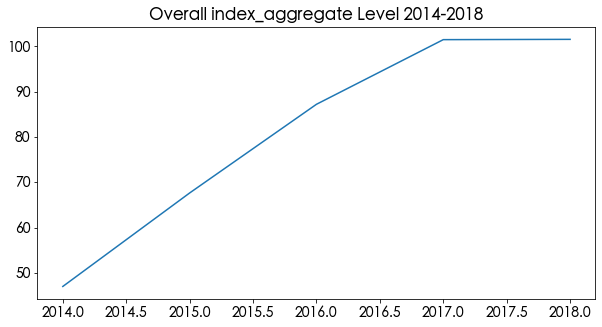

In [20]:
df.head()
year_grouped = df.groupby("year")['index_aggregate'].mean()
plt.title("Overall index_aggregate Level 2014-2018")
plt.plot(year_grouped)

In [21]:
df.columns

Index(['year', 'county_name', 'county_code_year14', 'prov_code', 'prov_name',
       'pref_code', 'pref_name', 'index_aggregate', 'coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness'],
      dtype='object')

In [22]:
top_10_index = df.sort_values(["index_aggregate"], ascending=False).head(10)
top_10_index

,year,county_name,county_code_year14,prov_code,prov_name,pref_code,pref_name,index_aggregate,coverage_breadth,usage_depth,...,credit,credit_investigation,digitization_level,flb,gdp,per_gdp,urban,industry,ip,tradeopeness
2548,2015,昆山市,320583,32,江苏省,3205,苏州市,131.75,168.16,107.38,...,107.13,97.98,55.79,22000000.0,31000000.0,186582.0,0.196271,0.518705,0.921139,1.087865
1803,2015,义乌市,330782,33,浙江省,3307,金华市,129.92,168.43,130.89,...,134.28,90.52,1.04,21000000.0,10000000.0,135882.0,0.196271,0.312215,0.819610,2.018084
7314,2018,义乌市,330782,33,浙江省,3307,金华市,127.21,111.40,175.40,...,197.42,136.26,91.84,24000000.0,12000000.0,95795.0,0.324884,0.279094,0.193353,2.033799
3222,2015,郫县,510124,51,四川省,5101,成都市,127.06,166.50,91.18,...,88.61,92.37,62.05,3500000.0,4300000.0,51865.0,0.496786,0.339599,0.101628,0.051932
1871,2015,伊宁市,654002,65,新疆维吾尔自治区,6540,伊犁哈萨克自治州,126.92,174.81,73.94,...,65.00,58.25,65.10,4400000.0,2100000.0,37957.0,0.641036,0.084952,0.101628,0.031946
2032,2015,双流县,510122,51,四川省,5101,成都市,126.79,163.03,104.30,...,106.13,93.72,48.01,6800000.0,8700000.0,67862.0,0.594423,0.339599,0.101628,0.228966
8128,2018,昆山市,320583,32,江苏省,3205,苏州市,125.19,109.66,157.96,...,188.45,135.86,116.96,34000000.0,38000000.0,230270.0,0.324884,0.509170,0.193353,0.237948
8742,2018,莱山区,370613,37,山东省,3706,烟台市,124.36,109.46,147.28,...,166.50,132.64,131.90,3500000.0,1300000.0,34697.0,0.324884,0.269670,0.193353,0.237948
7784,2018,定海区,330902,33,浙江省,3309,舟山市,124.27,105.05,163.29,...,180.30,133.39,116.86,1200000.0,1300000.0,34697.0,0.324884,0.269670,0.193353,0.237948
3286,2015,闽侯县,350121,35,福建省,3501,福州市,124.12,156.16,98.82,...,107.91,81.67,64.33,2300000.0,4400000.0,62810.0,0.196271,0.543683,0.101628,0.031946


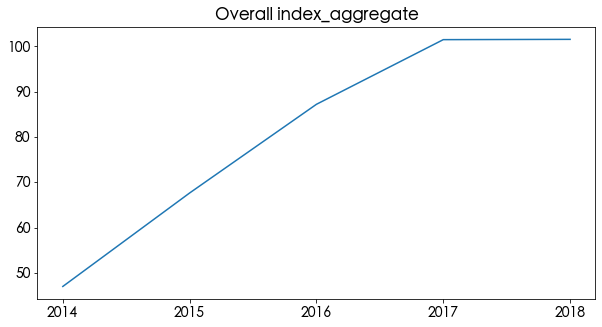

In [23]:
gdp = df.groupby("year")["index_aggregate"].mean()
# gdp_mean = df.groupby("year")["gdp"].median()
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Overall index_aggregate")
plt.xticks([2014,2015,2016,2017,2018])
plt.plot(gdp)

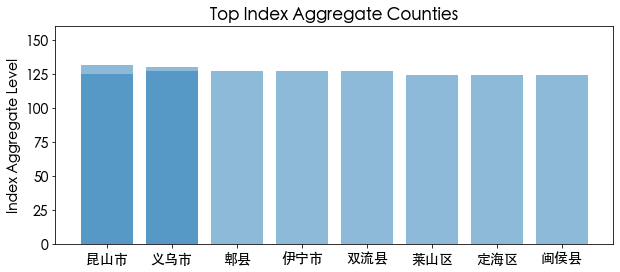

In [25]:
plt.figure(figsize=(10,4))
plt.bar(top_10_index.county_name, top_10_index.index_aggregate, align='center', alpha=0.5, )
plt.ylabel('Index Aggregate Level')
plt.title('Top Index Aggregate Counties')
plt.ylim((0,160))
plt.savefig('top_index_aggre.png')
plt.show()

## Growth Rate

In [95]:
df.head()

,year,county_name,county_code_year14,prov_code,prov_name,pref_code,pref_name,index_aggregate,coverage_breadth,usage_depth,...,credit,credit_investigation,digitization_level,flb,gdp,per_gdp,urban,industry,ip,tradeopeness
0,2014,万全县,130729,13,河北省,1307,张家口市,44.58,52.42,37.77,...,35.34,0.0,31.04,528889.0,634602.0,27323.0,0.214560,0.432618,0.064318,0.010522
1,2014,万安县,360828,36,江西省,3608,吉安市,44.39,33.21,78.26,...,85.27,0.0,19.80,341328.0,575617.0,27323.0,0.214560,0.361632,0.106057,0.031628
2,2014,万年县,361129,36,江西省,3611,上饶市,47.34,42.86,60.84,...,57.87,0.0,37.63,644512.0,1000000.0,27323.0,0.214560,0.361632,0.106057,0.031628
3,2014,万源市,511781,51,四川省,5117,达州市,41.67,46.64,41.19,...,45.24,0.0,26.13,574068.0,1200000.0,28395.0,0.561833,0.361632,0.078333,0.005540
4,2014,万荣县,140822,14,山西省,1408,运城市,45.07,48.69,44.57,...,62.17,0.0,34.01,359126.0,618199.0,13778.0,0.069839,0.361632,0.106057,0.031628


## Using Ridge Regression

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge,ElasticNet

<AxesSubplot:>

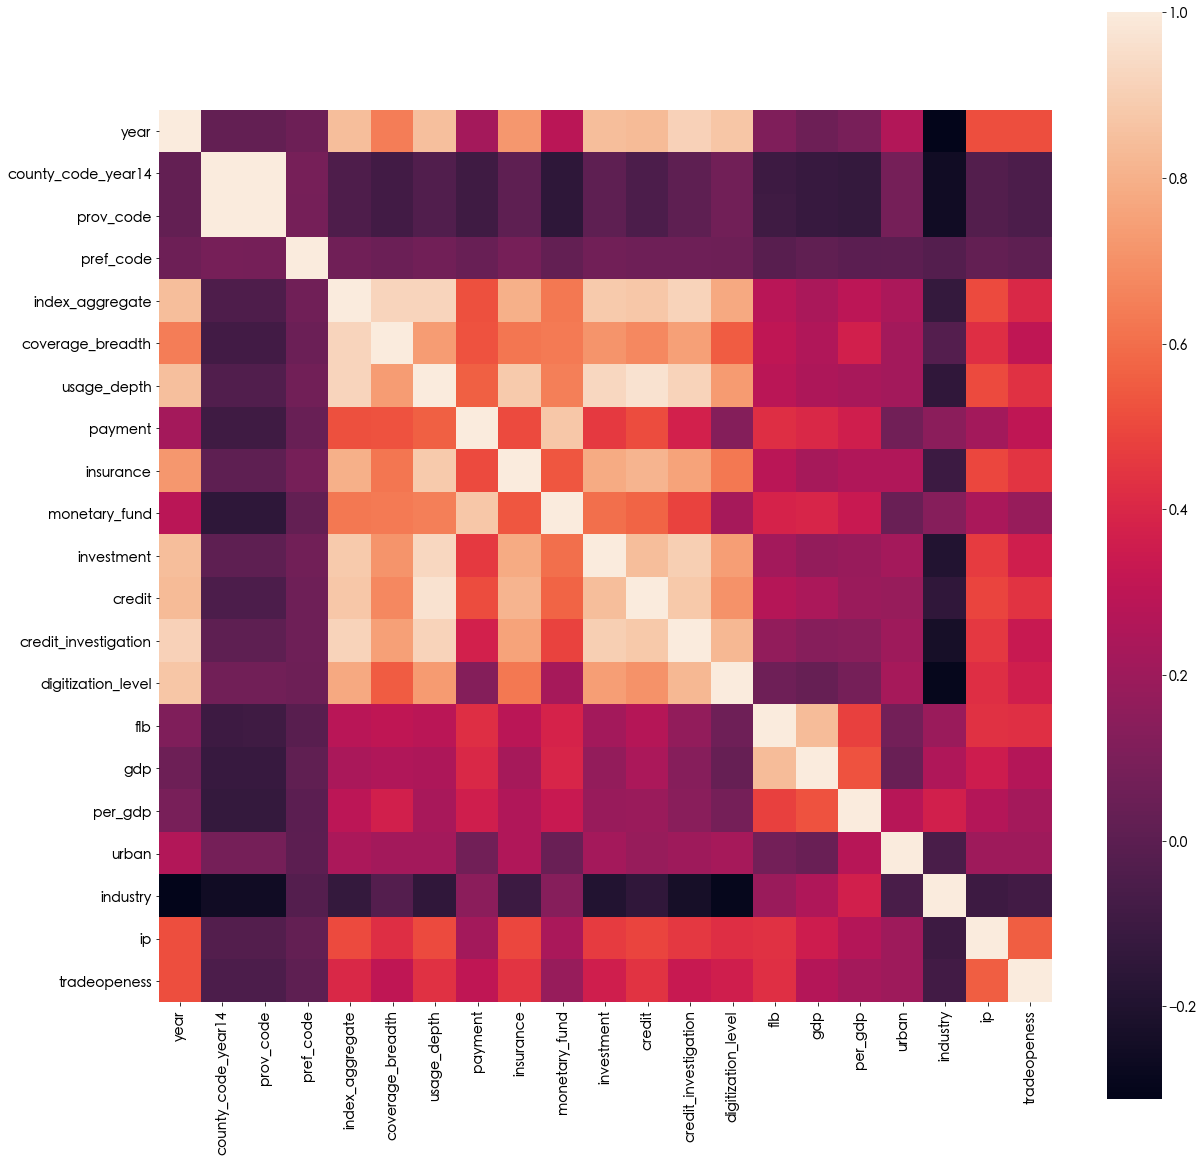

In [64]:
corr_mat=df.corr()
fi,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat,square=True)

In [91]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split


y = df["index_aggregate"]
X = df[['coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness']]
X = RobustScaler().fit_transform(X)
X = pd.DataFrame(X, columns = ['coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
# def regularization(model,alpha_range):
#     rmse_score_insample=[]
#     rmse_score_outsample=[]
#     r2_score_insample=[]
#     r2_score_outsample=[]
#     for i in alpha_range:
#         regularization = model(alpha=i,normalize=True)
#         regularization.fit(x_train,y_train)
#         y_pred_train = regularization.predict(x_train)
#         y_pred_train = y_pred_train.reshape(-1,1)
#         y_pred_test=regularization.predict(x_test)
#         y_pred_test = y_pred_test.reshape(-1,1)
#         rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train )))
#         rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
#         r2_score_insample.append(metrics.r2_score(y_train, y_pred_train))
#         r2_score_outsample.append(metrics.r2_score(y_test, y_pred_test))
#     df=pd.DataFrame()
#     df['alpha']=alpha_range
#     df['rmse_score_insample'] = rmse_score_insample
#     df['rmse_score_outsample']= rmse_score_outsample 
#     df['r2_score_insample'] = r2_score_insample
#     df['r2_score_outsample'] = r2_score_outsample
#     return df.plot(x = 'alpha', y = ['rmse_score_insample', 'rmse_score_outsample'])

In [93]:
# alpha_range_ridge = np.arange(0.001,1,0.1)
# print(regularization(Ridge,alpha_range_ridge))

In [94]:
X_train_transformed = x_train.copy()
linreg = LinearRegression().fit(X_train_transformed, y_train)
ridge = Ridge().fit(X_train_transformed, y_train)
lasso = Lasso().fit(X_train_transformed, y_train)
en = ElasticNet().fit(X_train_transformed, y_train)
pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X_train_transformed.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X_train_transformed.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X_train_transformed.columns),
    "coef_elastic_net": pd.Series(en.coef_, index=X_train_transformed.columns)
})

,coef_linreg,coef_ridge,coef_lasso,coef_elastic_net
coverage_breadth,13.274266,13.262707,13.440514,7.170234
usage_depth,14.170925,11.332335,12.528770,3.118966
payment,0.000156,0.008865,0.000000,0.635648
insurance,-0.000649,0.484353,0.000000,2.488287
monetary_fund,-0.000040,0.147474,0.000000,1.823712
investment,-0.000426,0.762578,0.000000,3.225963
credit,-0.000989,1.321231,0.067689,3.157250
credit_investigation,-0.000649,0.242229,0.000000,3.392936
digitization_level,7.646285,7.599476,6.256401,3.707699
flb,0.000003,-0.002026,0.000000,0.000000


## Using Xgboost

In [26]:
df.head()

,year,county_name,county_code_year14,prov_code,prov_name,pref_code,pref_name,index_aggregate,coverage_breadth,usage_depth,...,credit,credit_investigation,digitization_level,flb,gdp,per_gdp,urban,industry,ip,tradeopeness
0,2014,万全县,130729,13,河北省,1307,张家口市,44.58,52.42,37.77,...,35.34,0.0,31.04,528889.0,634602.0,27323.0,0.214560,0.432618,0.064318,0.010522
1,2014,万安县,360828,36,江西省,3608,吉安市,44.39,33.21,78.26,...,85.27,0.0,19.80,341328.0,575617.0,27323.0,0.214560,0.361632,0.106057,0.031628
2,2014,万年县,361129,36,江西省,3611,上饶市,47.34,42.86,60.84,...,57.87,0.0,37.63,644512.0,1000000.0,27323.0,0.214560,0.361632,0.106057,0.031628
3,2014,万源市,511781,51,四川省,5117,达州市,41.67,46.64,41.19,...,45.24,0.0,26.13,574068.0,1200000.0,28395.0,0.561833,0.361632,0.078333,0.005540
4,2014,万荣县,140822,14,山西省,1408,运城市,45.07,48.69,44.57,...,62.17,0.0,34.01,359126.0,618199.0,13778.0,0.069839,0.361632,0.106057,0.031628


In [27]:
ca_col = [x for x in df.columns if df.dtypes[x] == "object"]
nu_col = [x for x in df.columns if df.dtypes[x] != "object"]

In [28]:
ca_col

['county_name', 'prov_name', 'pref_name']

In [29]:
nu_col

['year',
 'county_code_year14',
 'prov_code',
 'pref_code',
 'index_aggregate',
 'coverage_breadth',
 'usage_depth',
 'payment',
 'insurance',
 'monetary_fund',
 'investment',
 'credit',
 'credit_investigation',
 'digitization_level',
 'flb',
 'gdp',
 'per_gdp',
 'urban',
 'industry',
 'ip',
 'tradeopeness']

In [30]:
df.columns

Index(['year', 'county_name', 'county_code_year14', 'prov_code', 'prov_name',
       'pref_code', 'pref_name', 'index_aggregate', 'coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness'],
      dtype='object')

In [31]:
y = df["index_aggregate"]

In [32]:
X = df[['coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness']]

In [62]:
X.head()

,coverage_breadth,usage_depth,payment,insurance,monetary_fund,investment,credit,credit_investigation,digitization_level,flb,gdp,per_gdp,urban,industry,ip,tradeopeness
0,0.414710,0.215336,0.253060,0.270633,0.246113,0.276129,0.313916,0.0,0.415321,0.015534,0.016083,0.068599,0.686824,0.140048,0.040320,0.005253
1,0.322844,0.446180,0.344376,0.510482,0.441763,0.353663,0.522262,0.0,0.391555,0.010018,0.014529,0.068599,0.686824,0.116538,0.075242,0.015630
2,0.368992,0.346864,0.348687,0.467725,0.422017,0.289645,0.407928,0.0,0.429254,0.018935,0.025704,0.068599,0.686824,0.116538,0.075242,0.015630
3,0.387069,0.234835,0.264158,0.357350,0.185634,0.210524,0.355226,0.0,0.404939,0.016863,0.030971,0.071908,0.826206,0.116538,0.052047,0.002803
4,0.396872,0.254105,0.259846,0.247597,0.277163,0.203550,0.425871,0.0,0.421600,0.010541,0.015651,0.026784,0.628738,0.116538,0.075242,0.015630


In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X, columns = ['coverage_breadth',
       'usage_depth', 'payment', 'insurance', 'monetary_fund', 'investment',
       'credit', 'credit_investigation', 'digitization_level', 'flb', 'gdp',
       'per_gdp', 'urban', 'industry', 'ip', 'tradeopeness'])

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [48]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [51]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[16:03:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 30.293280


In [53]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,2.681308,0.366730,3.309652,0.562996
46,2.649602,0.364027,3.287302,0.561923
47,2.592660,0.346600,3.232437,0.533956
48,2.533843,0.354524,3.179478,0.531106
49,2.489865,0.344093,3.138203,0.511278


In [55]:
(cv_results["test-rmse-mean"]).tail(1)

49    3.138203
Name: test-rmse-mean, dtype: float64

In [56]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[16:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


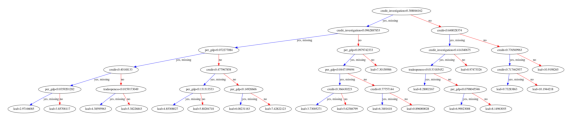

In [66]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

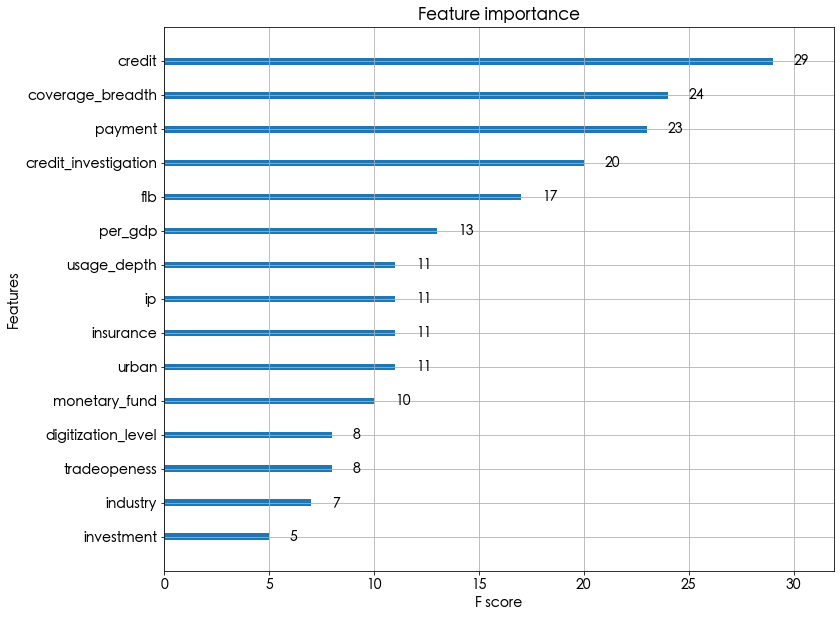

In [58]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [59]:
# import matplotlib
# print(matplotlib.matplotlib_fname())

In [60]:
# import matplotlib.font_manager
# matplotlib.font_manager._rebuild()

In [3]:
# [f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]

[<Font 'Heiti TC' (STHeitiTC-Medium-01.ttf) normal normal 400 normal>,
 <Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>,
 <Font 'STHeiti' (STXIHEI.ttf) normal normal 300 normal>,
 <Font 'STHeiti' (STHEITI.ttf) normal normal 400 normal>,
 <Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>]